In [1]:
import scripts.framework as fr
import scripts.headrpp_alg as headrpp
import scripts.dijkstra_alg as dijkstra
import scripts.nsga2 as nsga2
import scripts.experiment5 as exp5
import matplotlib.pyplot as plt
import time

In [2]:
# Variables
start_node_sp = 22
end_node_sp = 434
start_node_nl = 0
end_node_nl = 154

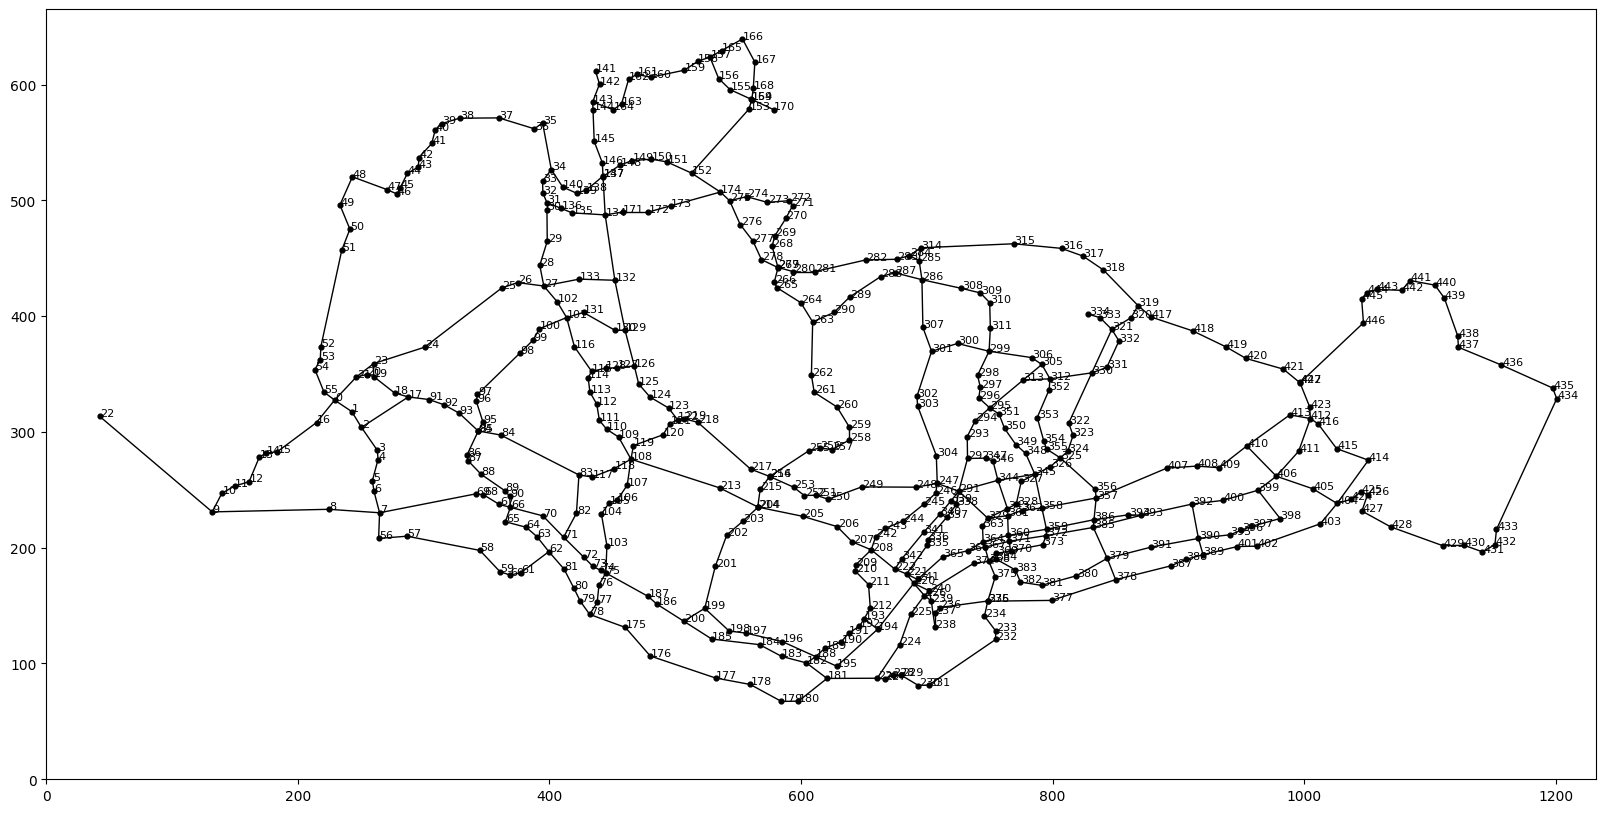

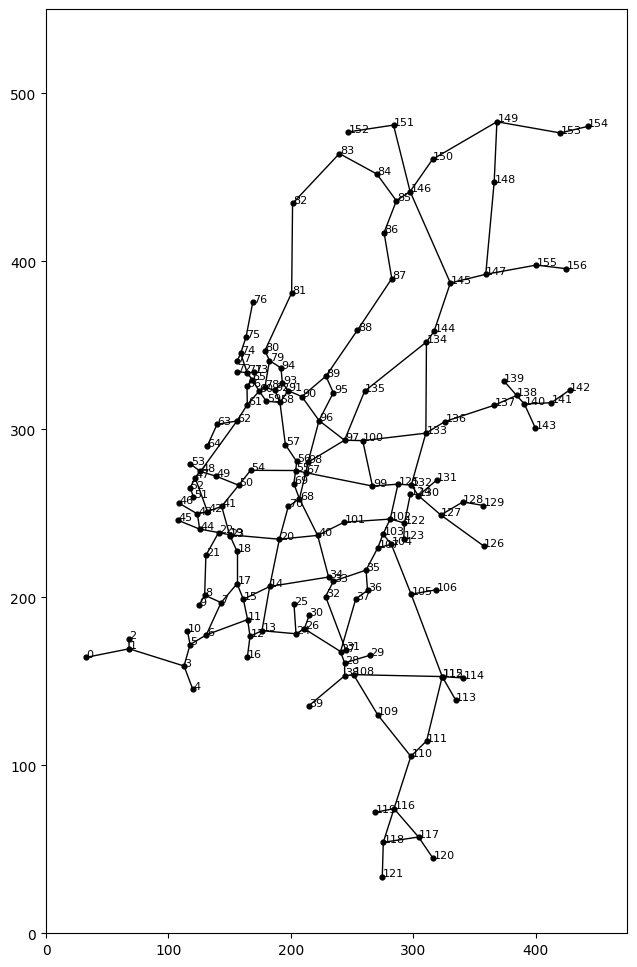

In [3]:
repr_sp = fr.Representation("./data/nodes_sp.csv", "./data/edges_sp.csv", maptype="sp")
repr_sp.plot_map(plot_nodes=True)

repr_nl = fr.Representation("./data/nodes_nl.csv", "./data/edges_nl.csv", maptype="nl")
repr_nl.plot_map(plot_nodes=True)

In [4]:
weights = [1, 0, 0, 0] # distance, traffic, pollution, hotspots

alg = dijkstra.DIJKSTRA(repr_sp, start_node_sp, end_node_sp)
route, cost = alg.run_algorithm(show_results=True, weights=weights)

alg = dijkstra.DIJKSTRA(repr_nl, start_node_nl, end_node_nl)
route, cost = alg.run_algorithm(show_results=True, weights=weights)

KeyboardInterrupt: 

In [ ]:
nr_generations = 200
weights = [1/4, 1/4, 1/4, 1/4] # distance, traffic, pollution, hotspots

pop_size_sg = 50
alg = headrpp.HEADRPP(repr_sp, nr_generations, start_node_sp, end_node_sp, pop_size_sg, weights, 0.8, 0.3, 2)
results = alg.run_algorithm(show_results=False, save_name="images/singapore")
repr_sp.plot_map(results[1], plot_nodes=False, show_axes=False)

pop_size_nl = 10
alg = headrpp.HEADRPP(repr_nl, nr_generations, start_node_nl, end_node_nl, pop_size_nl, weights, 0.8, 0.3, 2)
results = alg.run_algorithm(show_results=False, save_name="images/netherlands")
repr_nl.plot_map(results[1], plot_nodes=False, show_axes=False)

In [ ]:
nr_generations = 200
weights = [1/4, 1/4, 1/4, 1/4] # distance, traffic, pollution, hotspots

pop_size_sg = 50
alg = nsga2.NSGA2(repr_sp, nr_generations, start_node_sp, end_node_sp, pop_size_sg, weights, 0.8, 0.3, 2)
results = alg.run_algorithm(show_results=False, save_name="images/singapore")
repr_sp.plot_map(results[1], plot_nodes=False, show_axes=False)

pop_size_nl = 10
alg = nsga2.NSGA2(repr_nl, nr_generations, start_node_nl, end_node_nl, pop_size_nl, weights, 0.8, 0.3, 2)
results = alg.run_algorithm(show_results=False, save_name="images/netherlands")
repr_nl.plot_map(results[1], plot_nodes=False, show_axes=False)

In [ ]:
from scripts.comparator import Comparator

# Variables
pop_size_sp = 50
pop_size_nl = 10
nr_gen_headrpp = 200
nr_gen_nsga2 = 200
weights = [1/4, 1/4, 1/4, 1/4]
p_crossover = 0.8
p_mutation = 0.3
group_size = 2

comp = Comparator(pop_size_sp, pop_size_nl, nr_gen_headrpp, nr_gen_nsga2, weights, p_crossover, p_mutation, group_size)

# Start and end nodes
start_node_sp = 22
end_node_sp = 434
start_node_nl = 0
end_node_nl = 154

nr_runs = 100
comp.run_comparison(nr_runs, start_node_sp, end_node_sp, start_node_nl, end_node_nl)

# Single objective comparison HEADRPP, NSGA-II and Dijkstra

Make results of different algorithms in one plot + Performance of HEADRPP vs NSGA-II vs Dijkstra when only considering distance/pollution/traffic/hotspots (look at best total distance at end of generation to compare with dijkstra) (hotspots not dijkstra: explain why, but compare for other algorithms)

In [5]:
# Variables
pop_size_sp = 50
pop_size_nl = 10
nr_gen_headrpp = 200
nr_gen_nsga2 = 200
p_crossover = 0.8
p_mutation = 0.3
nr_runs = 100


# Start and end nodes
start_node_sp = 133
end_node_sp = 334
start_node_nl = 120
end_node_nl = 83

version="Route3"

weight_combinations = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
weights = [1, 0, 0, 0]
# Experiment 5 - Singapore - weight combination 1
exp5.run_experiment_5(
    version,
    repr_sp,
    start_node_sp,
    end_node_sp,
    pop_size_sp,
    nr_gen_headrpp,
    nr_gen_nsga2,
    nr_runs,
    "Singapore",
    weights
)

KeyboardInterrupt: 

In [ ]:
# Experiment 5 - Singapore - weight combination 2
weights = [0, 1, 0, 0]
exp5.run_experiment_5(
    version,
    repr_sp,
    start_node_sp,
    end_node_sp,
    pop_size_sp,
    nr_gen_headrpp,
    nr_gen_nsga2,
    nr_runs,
    "Singapore",
    weights
)

In [ ]:
# Experiment 5 - Singapore - weight combination 3
weights = [0, 0, 1, 0]
exp5.run_experiment_5(
    version,
    repr_sp,
    start_node_sp,
    end_node_sp,
    pop_size_sp,
    nr_gen_headrpp,
    nr_gen_nsga2,
    nr_runs,
    "Singapore",
    weights
)

In [ ]:
# Experiment 5 - Singapore - weight combination 4
weights = [0, 0, 0, 1]
exp5.run_experiment_5(
    version,
    repr_sp,
    start_node_sp,
    end_node_sp,
    pop_size_sp,
    nr_gen_headrpp,
    nr_gen_nsga2,
    nr_runs,
    "Singapore",
    weights
)

In [ ]:
# Experiment 5 - Netherlands - weight combination 1
weights = [1, 0, 0, 0]
exp5.run_experiment_5(
    version,
    repr_nl,
    start_node_nl,
    end_node_nl,
    pop_size_nl,
    nr_gen_headrpp,
    nr_gen_nsga2,
    nr_runs,
    "Netherlands",
    weights
)

In [ ]:
# Experiment 5 - Netherlands - weight combination 2
weights = [0, 1, 0, 0]
exp5.run_experiment_5(
    version,
    repr_nl,
    start_node_nl,
    end_node_nl,
    pop_size_nl,
    nr_gen_headrpp,
    nr_gen_nsga2,
    nr_runs,
    "Netherlands",
    weights
)

In [ ]:
# Experiment 5 - Netherlands - weight combination 3
weights = [0, 0, 1, 0]
exp5.run_experiment_5(
    version,
    repr_nl,
    start_node_nl,
    end_node_nl,
    pop_size_nl,
    nr_gen_headrpp,
    nr_gen_nsga2,
    nr_runs,
    "Netherlands",
    weights
)

In [ ]:
# Experiment 5 - Netherlands - weight combination 4
weights = [0, 0, 0, 1]
exp5.run_experiment_5(
    version,
    repr_nl,
    start_node_nl,
    end_node_nl,
    pop_size_nl,
    nr_gen_headrpp,
    nr_gen_nsga2,
    nr_runs,
    "Netherlands",
    weights
)